In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Figure 1C: IMPACT comparison

/usr/lib/python3.4/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


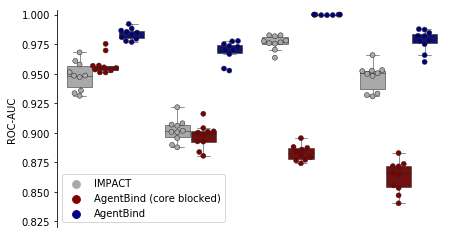

In [21]:
scores = {
    "1_Foxp3-IMPACT": [],
    "1_Foxp3-AB": [],
    "1_Foxp3-BLK": [],
    "2_Stat3-IMPACT": [],
    "2_Stat3-AB": [],
    "2_Stat3-BLK": [],
    "3_Tbet-IMPACT": [],
    "3_Tbet-AB": [],
    "3_Tbet-BLK": [],
    "4_Gata3-IMPACT": [],
    "4_Gata3-AB": [],
    "4_Gata3-BLK": [],
}

num = 10
# AgentBind
for i in range(40, 40+num):
    sumdata = pd.read_csv("/storage/pandaman/project/AgentBind-IMPACT/results-c%s/c/auc_summary.txt"%i, names=["TF","ROC","PR"], sep="\t")
    for j in range(sumdata.shape[0]):
        tf = sumdata["TF"].values[j]
        ab = sumdata["ROC"].values[j]
        if tf == "Foxp3": tf = "1_Foxp3"
        if tf == "Stat3": tf = "2_Stat3"
        if tf == "Tbet": tf = "3_Tbet"
        if tf == "Gata3": tf = "4_Gata3"
        #im = sumdata["IMPACT"].values[j]
        #scores[tf+"-IMPACT"].append(im)
        scores[tf+"-AB"].append(ab)
        
# w/ masks
for i in range(60, 60+num):
    sumdata = pd.read_csv("/storage/pandaman/project/AgentBind-IMPACT/results-c%s/c/auc_summary.txt"%i, names=["TF","ROC","PR"], sep="\t")
    for j in range(sumdata.shape[0]):
        tf = sumdata["TF"].values[j]
        ab = sumdata["ROC"].values[j]
        if tf == "Foxp3": tf = "1_Foxp3"
        if tf == "Stat3": tf = "2_Stat3"
        if tf == "Tbet": tf = "3_Tbet"
        if tf == "Gata3": tf = "4_Gata3"
        scores[tf+"-BLK"].append(ab)
        
# IMPACT
scores["1_Foxp3-IMPACT"] = [0.9484 ,   0.9471   , 0.9483 ,   0.9512,    0.9357  ,  0.9313 ,   0.968    ,0.9578 ,   0.9608   , 0.9335]
scores["4_Gata3-IMPACT"] = [0.9319,    0.9526  ,  0.9499 ,   0.9308 ,   0.9657 ,   0.9481  ,  0.9504  ,  0.9522,    0.9332 ,   0.9531]
scores["2_Stat3-IMPACT"] = [0.8897 ,   0.9008   , 0.908   , 0.906   , 0.8877  ,  0.8955   , 0.9069 ,   0.9017   , 0.9216 ,   0.9004]
scores["3_Tbet-IMPACT"] = [0.978 ,   0.9825  ,  0.9765 ,   0.9817  ,  0.9758  ,  0.9635  ,  0.9825  ,  0.9703 ,   0.9775,    0.9754]

# dataframe to output
idata = pd.DataFrame({
    "TF": (["1_Foxp3"]*num+["4_Gata3"]*num+["2_Stat3"]*num+["3_Tbet"]*num)*3,
    "Trial": (list(range(1, num+1))*4)*3,
    "method": ["IMPACT"]*4*num+["AgentBind"]*4*num+["AgentBind (core blocked)"]*4*num,
    "ROC-AUC": scores["1_Foxp3-IMPACT"]+scores["4_Gata3-IMPACT"]+scores["2_Stat3-IMPACT"]+scores["3_Tbet-IMPACT"] + \
        scores["1_Foxp3-AB"]+scores["4_Gata3-AB"]+scores["2_Stat3-AB"]+scores["3_Tbet-AB"] +\
        scores["1_Foxp3-BLK"]+scores["4_Gata3-BLK"]+scores["2_Stat3-BLK"]+scores["3_Tbet-BLK"]
})
idata = idata.sort_values("TF")

pal = {"IMPACT": "darkgray", "AgentBind": "navy", "AgentBind (core blocked)": "maroon"}
fig = plt.figure()
fig.set_size_inches((7, 4))
ax = fig.add_subplot(111)
#sns.set_style("darkgrid")
sns.swarmplot(x="TF", y="ROC-AUC", hue="method", data=idata, ax=ax, \
             palette=pal, split=True, linewidth=0.5, edgecolor='gray')
sns.boxplot(x="TF", y="ROC-AUC", hue="method", data=idata, ax=ax, \
            palette=pal, linewidth=0.5, showfliers=False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:6], labels[3:6], loc="best")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylim(0.82, 1.004)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([], [])
ax.set_xlabel("")

fig.savefig("ab_vs_impact.pdf")